In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
import geopandas as gpd
import mysql.connector
db=mysql.connector.connect(host='localhost',
                           username='root',
                           password='1234',
                           database='worldpopulation')
cur=db.cursor()

# Total Population & Country count

In [43]:
query="""select concat(round(sum(2022_population)/1000000000,2),'Billions'),count(country) from world_population"""
cur.execute(query)
data=cur.fetchall()
data
print('The World Population in 2022 is',data[0][0], 'and the Country count is',data[0][1])

The World Population in 2022 is 7.97Billions and the Country count is 234


# Top 10 Countries by Population

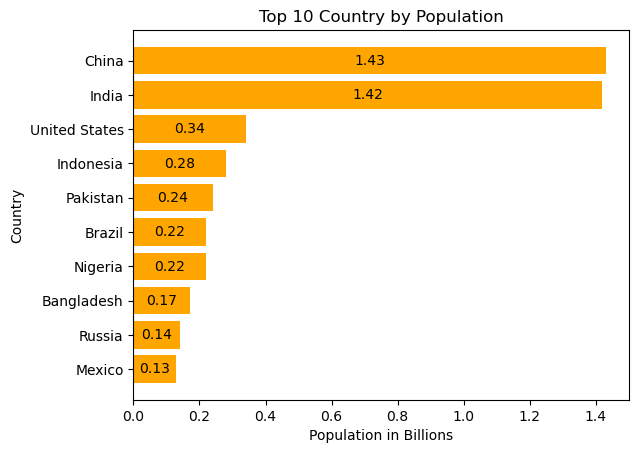

In [27]:
query="""select country,round(2022_population/1000000000,2) from world_population order by rk limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['country','population'])
df=df.sort_values(by='population',ascending=True)
barh=plt.barh(df['country'],df['population'],color='orange')
plt.bar_label(barh, labels=df['population'],label_type='center')
plt.title('Top 10 Country by Population')
plt.xlabel('Population in Billions')
plt.ylabel('Country')
plt.show()

# Continent wise Population

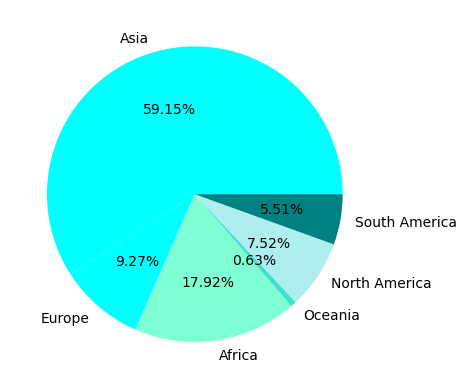

In [39]:
query="""select distinct(continent),round(sum(2022_Population)/1000000000,2) 
from world_population group by continent"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Continent','Population'])
value=df['Population']
legend=df['Continent']
plt.pie(value,labels=legend,autopct="%2.2f%%",colors=['cyan','aqua','aquamarine','turquoise','paleturquoise','teal'])
plt.show()

# Top 10 countries by Area

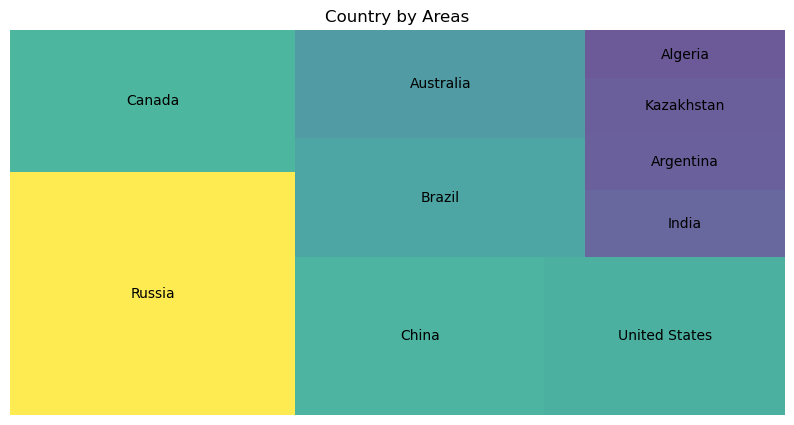

In [72]:
query="""select country,area from world_population
order by area desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns=['Country', 'Area'])
plt.figure(figsize=(10, 5))
squarify.plot(sizes=df['Area'], label=df['Country'], alpha=.8, color=plt.cm.viridis(df['Area'] / max(df['Area'])))
plt.title('Country by Areas')
plt.axis('off')  # Hide the axes
plt.show()

# Top 10 Countries by Growth Rate from 2020 to 2022

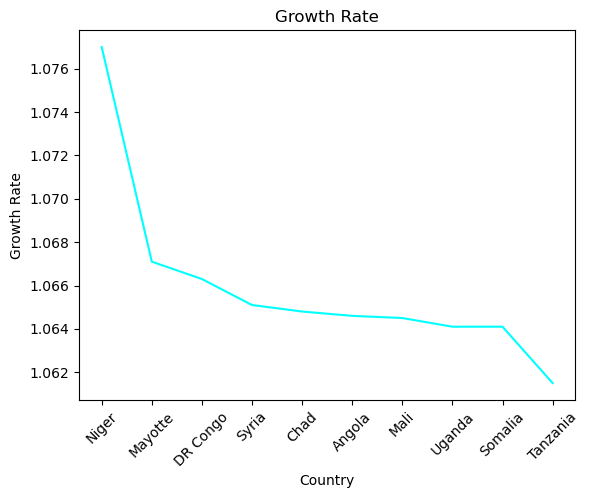

In [81]:
query="""select country,(2022_Population/2020_Population) grate from world_population
order by grate desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Country','Growth Rate'])
xpoint=df['Country']
ypoint=df['Growth Rate']
plt.plot(xpoint,ypoint,color='')
plt.title('Growth Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Growth Rate')
plt.show()

# Top 5 Country wise Population over Time

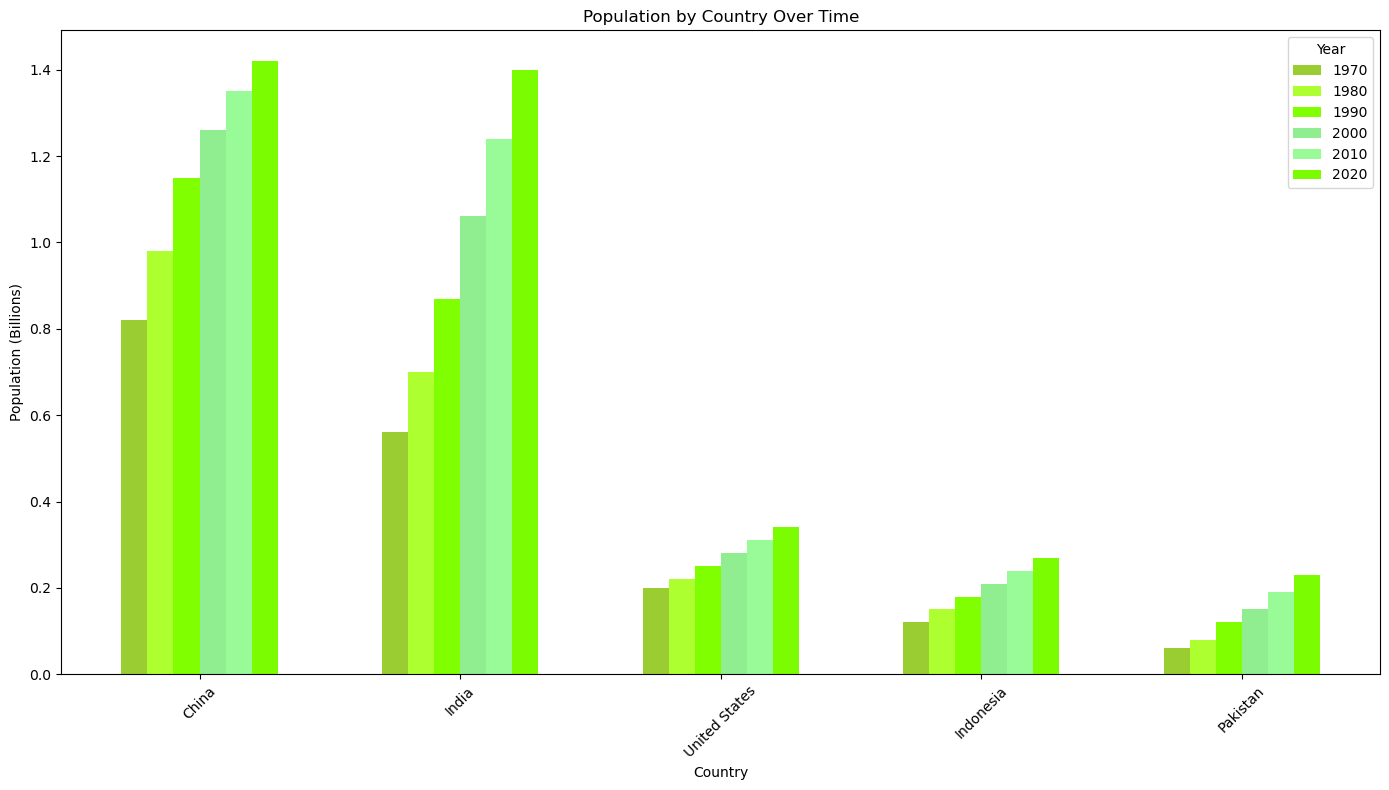

In [26]:
query="""select country, 
round(1970_Population/1000000000,2)'1970',
round(1980_Population/1000000000,2)'1980',
round(1990_Population/1000000000,2) '1990',
round(2000_Population/1000000000,2)'2000',
round(2010_Population/1000000000,2)'2010',
round(2020_population/1000000000,2) '2020'
from world_population 
order by 2020_Population desc limit 5"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Country','1970','1980','1990','2000','2010','2020'])
countries = df['Country']
years = ['1970', '1980', '1990', '2000', '2010', '2020']
bar_width = 0.1
positions = np.arange(len(countries))
colors=['yellowgreen','greenyellow','chartreuse','lightgreen','palegreen','lawngreen']
fig, ax = plt.subplots(figsize=(14, 8))
for i, (year, color) in enumerate(zip(years, colors)):
    ax.bar(positions + i * bar_width, df[year], width=bar_width, label=year, color=color)
ax.set_xlabel('Country')
ax.set_ylabel('Population (Billions)')
ax.set_title('Population by Country Over Time')
ax.set_xticks(positions + bar_width * (len(years) / 2 - 0.5))
ax.set_xticklabels(countries)
ax.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


